In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

c:\users\anurag\anaconda3\envs\python_env1\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
X =  np.random.rand(1000,1)
Y = 2 + 4 * X+np.random.randn(1000,1)

In [5]:
X_t, y_t = make_regression(n_samples = 10000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2019)

In [9]:
y = Y.flatten()
slope, intercept,_,_,_ = stats.linregress(X,y)
print (slope)
print (intercept)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 1000

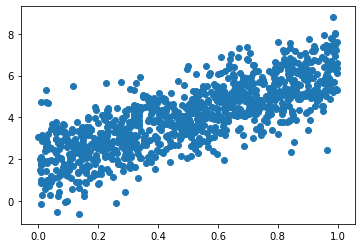

In [10]:
plt.scatter(X,y)

In [11]:
def cal_cost(w,X,y):
    m = len(X)
    prediction = X.dot(w)
    cost = (1/2*m)*np.sum(np.square(prediction-y))
    return cost

## Batch Gradient Decscent 

In [12]:
def plot_curve(X,X_b,y,w):
        plt.plot(X,y,'b.')
        plt.plot(X,X_b.dot(w),'r.')
        plt.show()

In [13]:
def batchGradient(X_b,X,y,w,lr,n_iter):
    m = len(X)
    cost_history = np.zeros(n_iter)
    for itr in list(range(n_iter)):
        prediction = X_b.dot(w)
        #print(prediction)
        w = w - (1/m)*lr*np.sum(X.T.dot((prediction - y)))
        if(itr%100==0):
            plot_curve(X,X_b,y,w)
        cost_history[itr] = cal_cost(w, X, y)
    return w,cost_history

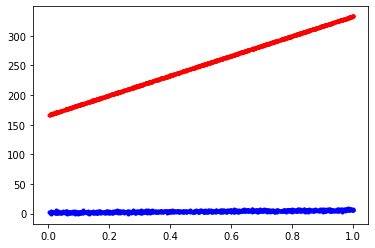

ValueError: shapes (1000,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [14]:
lr = 0.05
n_iter = 100
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta,cost_history = batchGradient(X_b,X, y, theta, lr, n_iter)

Text(0.5, 0, 'Iterations')

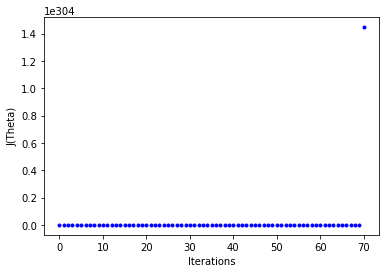

In [192]:
plt.plot(range(n_iter),cost_history,'b.')
plt.ylabel('J(Theta)')
plt.xlabel('Iterations')


In [193]:
theta

array([[-3.99606837e+207],
       [-3.99606837e+207]])

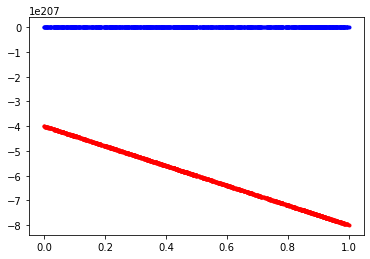

In [194]:
plt.plot(X,y,'b.')
plt.plot(X,X_b.dot(theta),'r.')